In [17]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operator, pixel manipulation, etc.

import math
import matplotlib.image as mpimg 
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

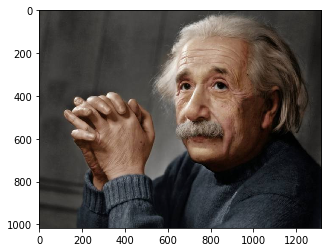

In [62]:
# Load image into variable and display it

eins = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\Test.png");
plt.imshow(eins)

In [63]:
eins.shape #shape x ncols

(1016, 1318, 4)

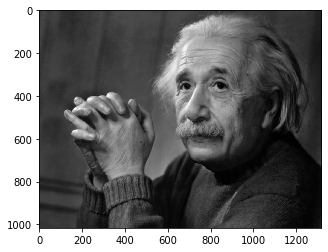

In [64]:
# Convert color image to grayscale to help extraction of edges

eins_gray = np.dot(eins, [1,1,1,1])
plt.imshow(eins_gray ,cmap = plt.get_cmap('gray'));

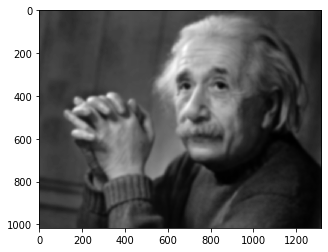

In [65]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones ignored
# filter signature: ndimage.gaussian_filter(input, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

eins_gray_blurred = ndimage.gaussian_filter(eins_gray, sigma=5) # sigma is image-specific, check!
plt.imshow(eins_gray_blurred, cmap = plt.get_cmap('gray'));



In [66]:
def SobelFilter(img, dir):
        dir=float(dir)
        Gdir = np.array([[-math.cos(dir)-math.sin(dir),-2*math.sin(dir),math.cos(dir)-math.sin(dir)], [-2*math.cos(dir),0,+2*math.cos(dir)],  [math.sin(dir)-math.cos(dir),2*math.sin(dir),math.cos(dir)+math.sin(dir)]])
        Res = ndimage.convolve(img, Gdir) 
        #Res signature is ndimage.convolve(img, Gdir, mode='constant', cval=0.0)
        return Res

In [67]:
# Normalize the pixel array, so that values are <= 1
def Normalize(img):
    img = img/np.max(img)
    return img


Enter any angle0.401426


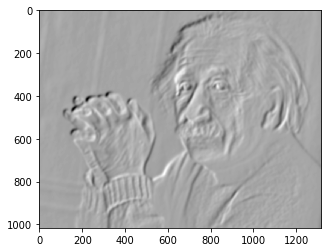

In [68]:
#Apply Sobel Filter in any given direction
rad=input("Enter any angle")
grad=SobelFilter(eins_gray_blurred, rad)
grad=Normalize(grad)
plt.imshow(grad, cmap = plt.get_cmap('gray'));